In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Regression avec SKlearn

In [24]:
np.random.seed(0)
m = 100 # Créer 100 examples
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

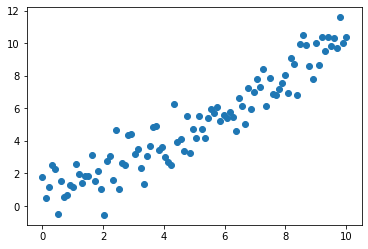

In [25]:
plt.scatter(X, y)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [27]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

0.8881140743377214

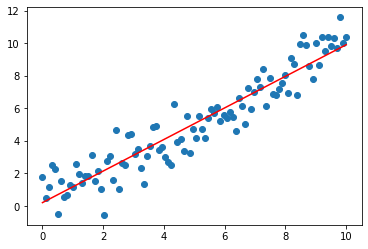

In [28]:
predictions = model.predict(X)
plt.scatter(X, y)
plt.plot(X, predictions, c='r')
plt.show()

In [32]:
np.random.seed(0)
m = 100 # Créer 100 examples
A = np.linspace(0, 10, m).reshape(m, 1)
b = X**2 + np.random.randn(m, 1)

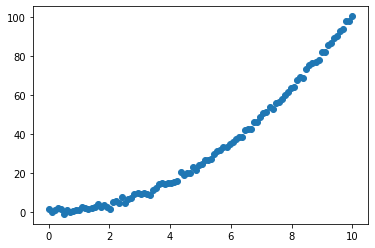

In [33]:
plt.scatter(A, b)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


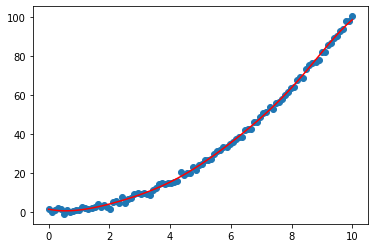

In [35]:
model = SVR(C=100)
model.fit(A, b)
model.score(A, b)

plt.scatter(A, b)
predictions = model.predict(A)
plt.plot(A, predictions, c='r')
plt.show()

# Classification avec SKlearn

In [36]:
import pandas as pd
import seaborn as sns

In [41]:
titanic = sns.load_dataset('titanic')

In [42]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [44]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0, 1], inplace=True)
titanic.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
model = KNeighborsClassifier()

In [48]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [51]:
X

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [52]:
model.fit(X, y)
model.score(X, y)

0.8319327731092437

In [55]:
def survie(model, pclass=1, sex=0, age=26):
    x = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x))
    
survie(model)

[1]
[[0.2 0.8]]
